In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/ITP/Assignments/Neural Network'

In [ ]:
os.chdir('/content/drive/MyDrive/ITP/Assignments/Neural Network')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/ITP/Assignments/Neural Network'

A communications equipment manufacturing company has a product which is responsible for emitting
informative signals. Company wants to build a machine learning model which can help the company to predict the
equipment’s signal quality using various parameters.

---



PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or quality

Import data

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('Signal.csv')

Data analysis & visualisation

In [ ]:
df.head()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

check null values

In [ ]:
df.describe().transpose()

count       mean        std  ...       50%        75%        max
Parameter 1      1599.0   8.319637   1.741096  ...   7.90000   9.200000   15.90000
Parameter 2      1599.0   0.527821   0.179060  ...   0.52000   0.640000    1.58000
Parameter 3      1599.0   0.270976   0.194801  ...   0.26000   0.420000    1.00000
Parameter 4      1599.0   2.538806   1.409928  ...   2.20000   2.600000   15.50000
Parameter 5      1599.0   0.087467   0.047065  ...   0.07900   0.090000    0.61100
Parameter 6      1599.0  15.874922  10.460157  ...  14.00000  21.000000   72.00000
Parameter 7      1599.0  46.467792  32.895324  ...  38.00000  62.000000  289.00000
Parameter 8      1599.0   0.996747   0.001887  ...   0.99675   0.997835    1.00369
Parameter 9      1599.0   3.311113   0.154386  ...   3.31000   3.400000    4.01000
Parameter 10     1599.0   0.658149   0.169507  ...   0.62000   0.730000    2.00000
Parameter 11     1599.0  10.422983   1.065668  ...  10.20000  11.100000   14.90000
Signal_Strength  1599.0   5.636023   0.807569  ...   6.00000   6.000000    8.00000

[12 rows x 8 columns]

In [ ]:
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

Data frame has no null values

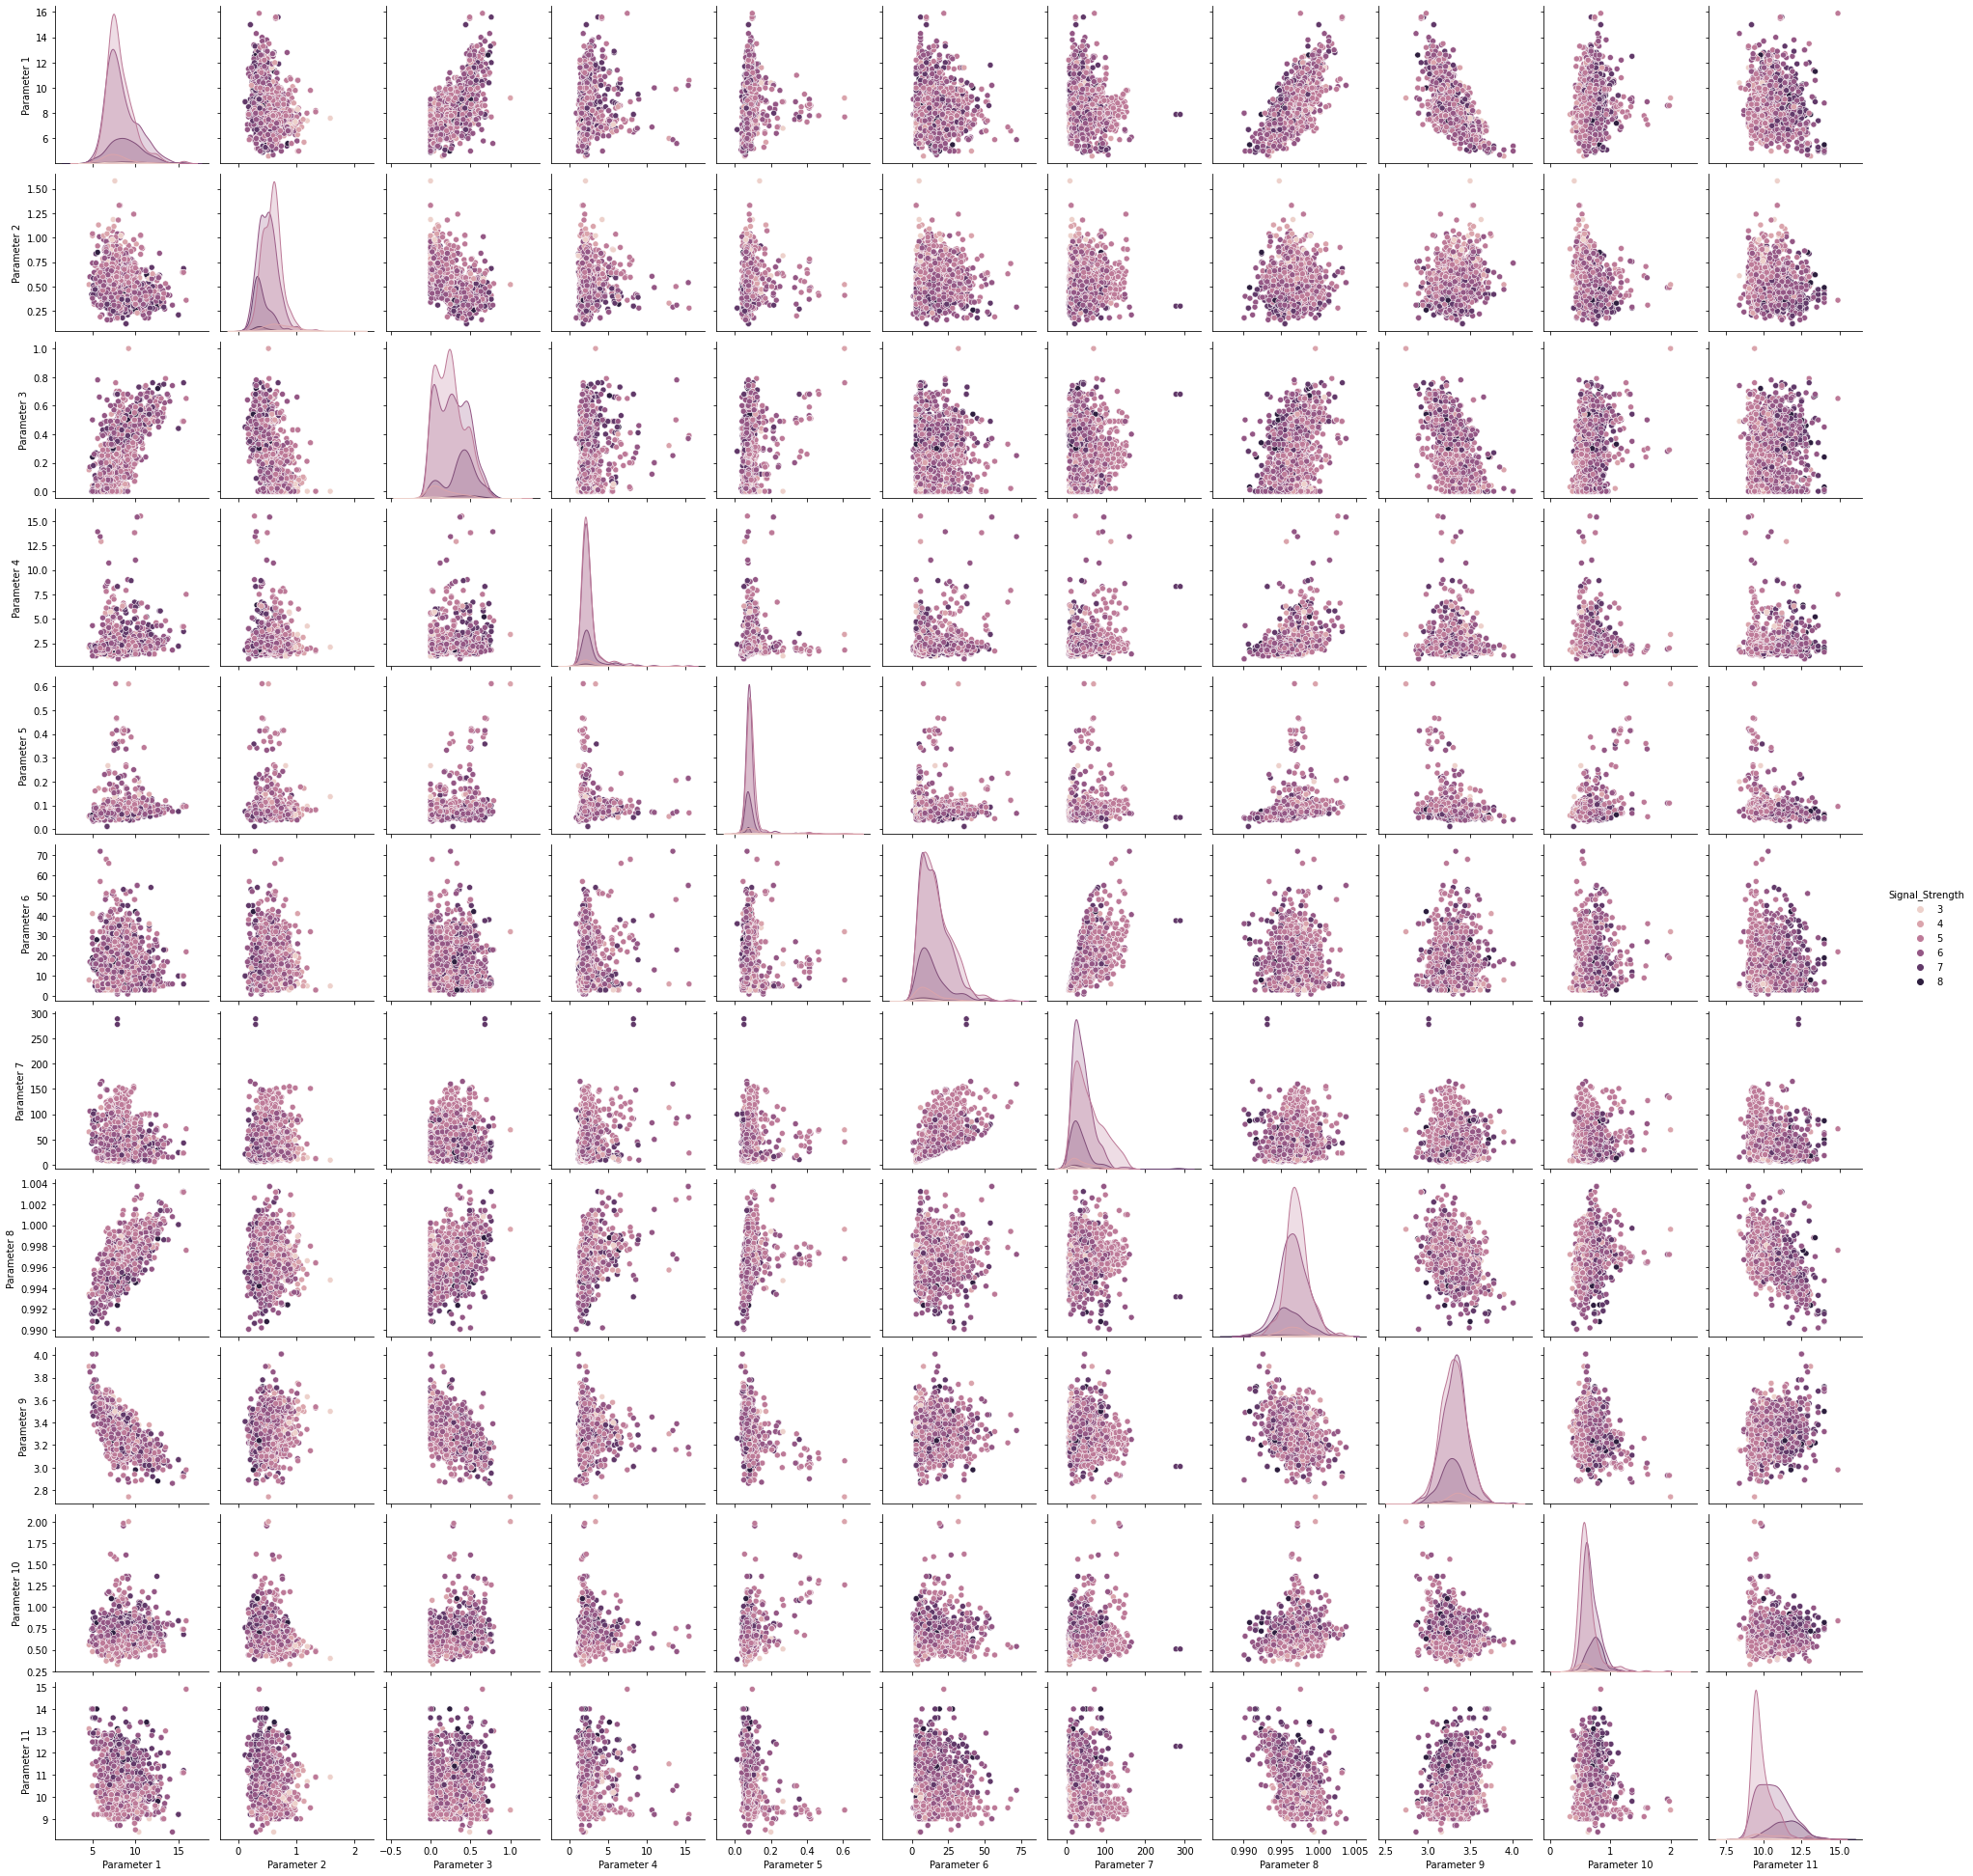

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df,hue='Signal_Strength')

From the pairplot it is clear that none of the parameter is good for using a classification model

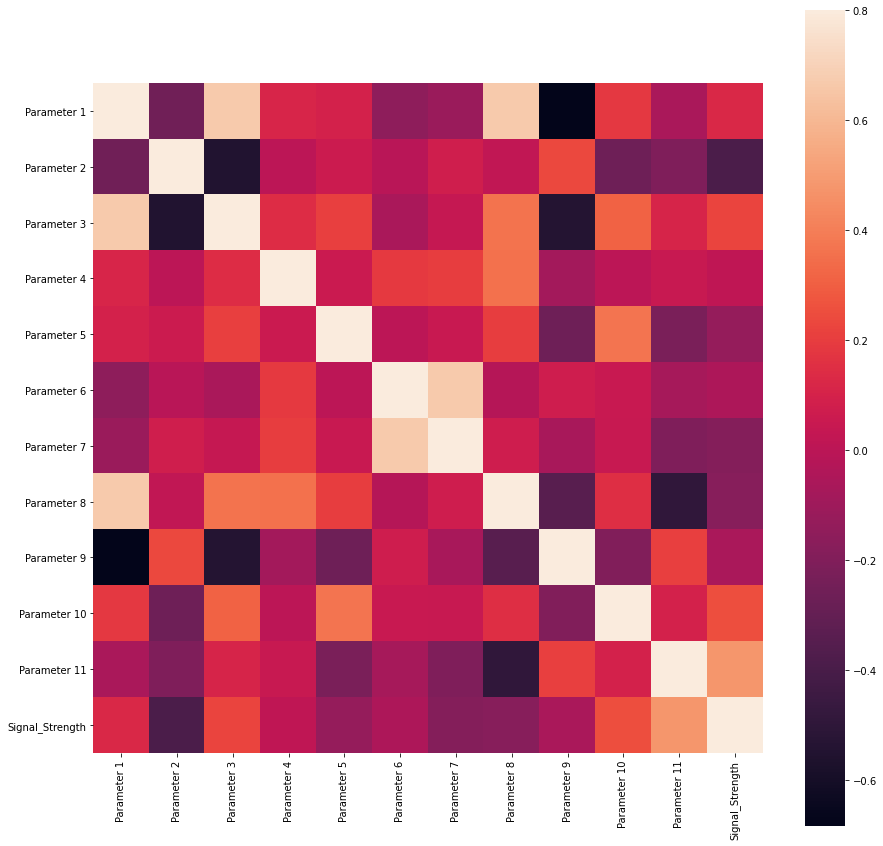

In [ ]:
C_mat = df.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [ ]:
C_mat

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
Parameter 1         1.000000    -0.256131  ...     -0.061668         0.124052
Parameter 2        -0.256131     1.000000  ...     -0.202288        -0.390558
Parameter 3         0.671703    -0.552496  ...      0.109903         0.226373
Parameter 4         0.114777     0.001918  ...      0.042075         0.013732
Parameter 5         0.093705     0.061298  ...     -0.221141        -0.128907
Parameter 6        -0.153794    -0.010504  ...     -0.069408        -0.050656
Parameter 7        -0.113181     0.076470  ...     -0.205654        -0.185100
Parameter 8         0.668047     0.022026  ...     -0.496180        -0.174919
Parameter 9        -0.682978     0.234937  ...      0.205633        -0.057731
Parameter 10        0.183006    -0.260987  ...      0.093595         0.251397
Parameter 11       -0.061668    -0.202288  ...      1.000000         0.476166
Signal_Strength     0.124052    -0.390558  ...      0.476166         1.000000

[12 rows x 12 columns]

Parameters 1, 3, 8, 9 have high correlation

Parameters 2, 3 have moderate correlation

Parameters 3 , 9 have moderate correlation

Parameters 6, 7 have high correlation

Hence Parameter 1,2,3,6,7,8,9 can be used to build the model
while parameters 4,5,10,11 can be droppped since they exhibit low correlation

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X=df[['Parameter 1','Parameter 2','Parameter 3','Parameter 6','Parameter 7','Parameter 8','Parameter 9']]
y=df['Signal_Strength']
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [ ]:
X_train.shape

(1279, 7)

In [ ]:
y_train.shape

(1279,)

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(30,activation='relu', input_dim = X_train.shape[1]))

# The Output Layer :
NN_model.add(Dense(1))

# Compile the network :

NN_model.compile(loss='mean_squared_error', optimizer='adam')
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2)


In [ ]:
X_test.shape

In [ ]:
import numpy as np
test_x = np.reshape([9, 0.64, 0.19, 60, 160,0.9998,3.18 ],(-1, 7))

test_y = NN_model.predict(test_x)

print(test_y)

# PROJECT OBJECTIVE: The need is to build a classifier which can use these parameters to determine the signal strength or quality [as number].

In [ ]:
df=pd.read_csv('Signal.csv')

## Add classification 1 for Signal strength > 5 meaing good quality and 0 for strength <=5

In [ ]:
df['quality']=np.where(df['Signal_Strength']>5,1,0)
df.head()
    

In [ ]:
df.dtypes

In [ ]:
df.describe().transpose()

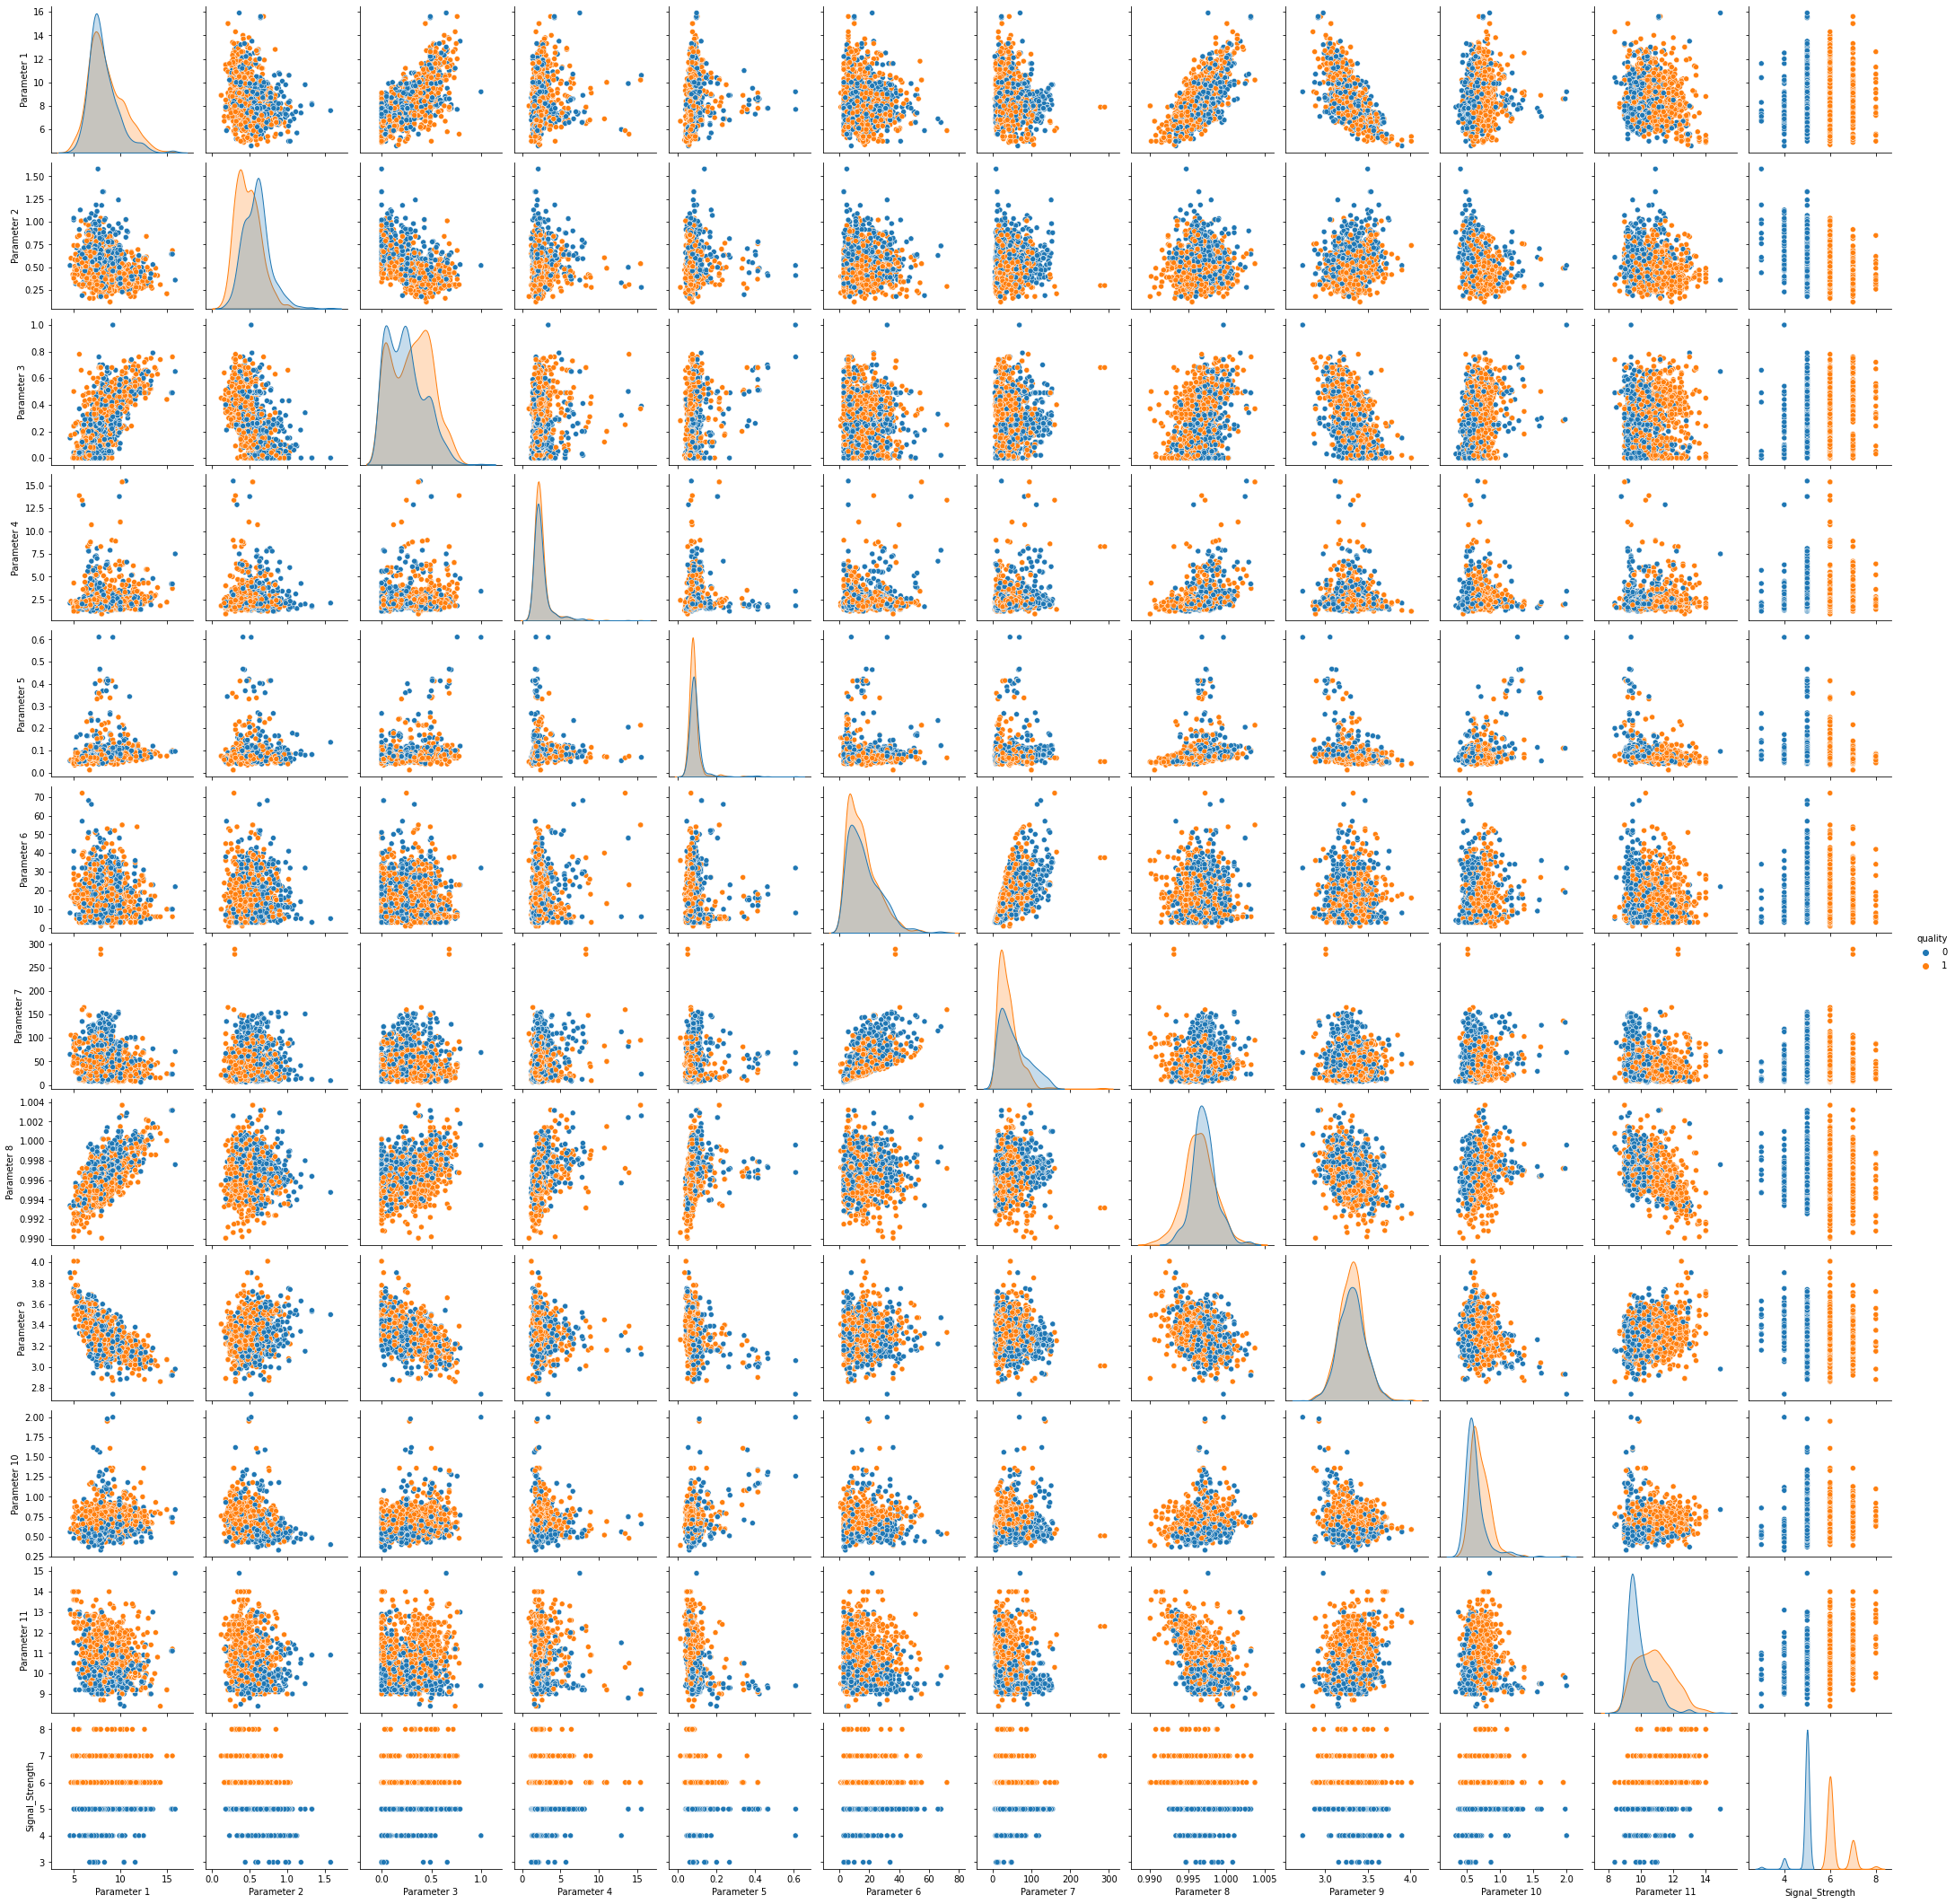

In [ ]:
sns.pairplot(df,hue='quality')

In [ ]:
X_cls=df.iloc[:,0:10]
y_cls=df['quality']
X_cls_train,X_cls_test, y_cls_train, y_cls_test=train_test_split(X_cls,y_cls,test_size=0.2,random_state=23)

In [ ]:
NN_model2 = Sequential()

# The Input Layer :
NN_model2.add(Dense(30,activation='relu', input_dim = X_cls_train.shape[1]))

# The Hidden Layer :
NN_model2.add(Dense(30,activation='relu'))

# The Output Layer :
NN_model2.add(Dense(2, activation='tanh'))

# Compile the network :

NN_model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 62        
Total params: 1,322
Trainable params: 1,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN_model2.fit(X_cls_train, y_cls_train, epochs=100, batch_size=32, validation_split = 0.2)

In [ ]:
X_new=X_cls_test[:11]
y_proba=NN_model2.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred=NN_model2.predict_classes(X_new)
y_pred

# Part 3: Building GUI

In [ ]:
import tkinter as tk

In [ ]:
from tkinter import ttk
import pandas as pd
import re

In [ ]:
get_ipython().system_raw('Xvfb :1 -screen 0 1600x1200x16  &')
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

In [ ]:
# App Window
win= tk.Tk()
win.title('ANN Regression & Classification Automation GUI')

In [ ]:
# Step 1: Import data from frame name------------------
Name=ttk.Label(win,text="Step 1: File Name")
Name.grid(row=0,column=0,sticky=tk.W)
Name_var=tk.StringVar()
Name_entrybox=ttk.Entry(win,width=16, textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)

def Import_Data():
  global DB
  DF_Name=Name_var.get()
  DB_extension=re.findall("\..*",DF_Name)
  if DB_extension==['.xlsx']:
    DB=pd.read_excel(DF_Name)
  elif DB_extension==['.csv']:
    DB_extension=pd.read_csv(DF_Name)
    #Blank empty window to print confirmation
    confirm='Done'
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=0,column=3)
    Confirm_entrybox.insert(1,str(confirm))

  
Import_Data_Button=ttk.Button(win,text='Import Data',command=Import_Data)
Import_Data_Button.grid(row=0,column=2)




#Step 2: Target data frame name
Target=ttk.Label(win.text="Step 2: Target Column")
Target.grid(row=1,column=0,sticky=tk.W)
Target_var=tk.StringVar()
Target_entrybox=ttk.Entry(win,width=16, textvariable=Target_var)
Target_entrybox.grid(row=1, column=1)

def Target_Data():
  global DB
  DF_Name=Name_var.get()
  DB_extension=re.findall("\..*",DF_Name)
  if DB_extension==['.xlsx']:
    DB=pd.read_excel(DF_Name)
  elif DB_extension==['.csv']:
    DB_extension=pd.read_csv(DF_Name)
    #Blank empty window to print confirmation
    confirm='Done'
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=2,column=3)
    Confirm_entrybox.insert(1,str(confirm))

  
Import_Data_Button=ttk.Button(win,text='Target Data',command=Target_Data)
Import_Data_Button.grid(row=2,column=2)
  

#Step 3: Predict data frame name
Prediction=ttk.Label(win.text="Step 3: Predict Column")
Prediction.grid(row=2,column=0,sticky=tk.W)
Prediction_var=tk.StringVar()
Prediction_entrybox=ttk.Entry(win,width=16, textvariable=Predict_var)
Prediction_entrybox.grid(row=2, column=1)

def ANN_Predict():
  ANN_Future['Prediction']=NN_model2.predict(ANN_Future)
  ANN_Future.to_csv('Prediction.csv')

ANN_Button=ttk.Button(win,text="ANN",command=ANN_Predict)
ANN_Button.grid(row=2,column=0)
  
win.mainloop()
